# Problema 4.7
###  Reacción en fase gaseosa utilizando un microrreactor en términos de flujo molar
"Elementos de Ingeniería de las reacciones químicas" ,Scott Fogler capitulo 4, página 204

![newnotebook](../imágenes/problema4.7.png)

Primero importaremos la librerías que nos ayudaran a resolver el problema (No olvides activar las librerías con **Shift+enter**):

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
def model(F, V):
    """
    Model for a microreator
    :param F: Flows (A, B, C)
    :param V: Volume (dm3)
    :return: ODE system
    """
    Fa, Fb, Fc = F[0], F[1], F[2]
    T = 698
    Cto = 1641/8.314/T
    E = 24000
    Ft = Fa + Fb + Fc
    Ca = Cto * Fa / Ft
    k = 0.29*np.exp(E/1.987*(1/500-1/T))
    Fao = 0.0000226
    vo = Fao / Cto
    Tau = V/vo
    ra = -k*Ca**2
    X = 1-Fa/Fao
    rb = -ra
    rc = -ra/2
    rateA = -ra
    dFadV = ra
    dFbdV = rb
    dFcdV = rc
    return [dFadV, dFbdV, dFcdV]

In [4]:
# Condiciones iniciales de flujo
F0 = [0.0000226, 0, 0]

# Volúmen
V = np.linspace(0, 1e-5, 100)

# Soluciió de ODES
F = odeint(model, F0, V)

Fa = F[:, 0]
Fao = 0.0000226
X = 1 - Fa / Fao
Fb = F[:,  1]
Fc = F[:, 2]

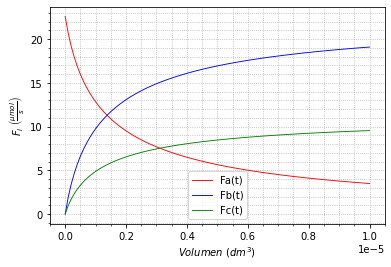

In [6]:
# Graficando solución de ODES
fig = plt.figure()
ax = fig.add_subplot(111)
ax.minorticks_on()
ax.plot(V, Fa * 1e6, 'r', linewidth=0.9, label='Fa')
ax.plot(V, Fb * 1e6, 'b', linewidth=0.9, label='Fb')
ax.plot(V, Fc * 1e6, 'g', linewidth=0.9, label='Fc')
ax.set_xlabel('$Volumen \\ (dm^3)$')
ax.set_ylabel('$F_i \\ \\left( \\frac{\\mu mol}{s} \\right)$')
ax.grid(which='BOTH', ls=':')
ax.grid(True)
ax.legend(['Fa(t)', 'Fb(t)', 'Fc(t)'])
plt.show()
